# Step 1: Import necessary libraries

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Device: ', device)

Device:  cuda


# Step 2: Load and preprocess the dataset

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

print('X.shape = ', X.shape)
print('y.shape = ', y.shape)

X.shape =  (150, 4)
y.shape =  (150,)


### Iris dataset

The Iris flower dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are **NOT** linearly separable from each other.

There are four features for each sample:

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

## Visualize the dataset

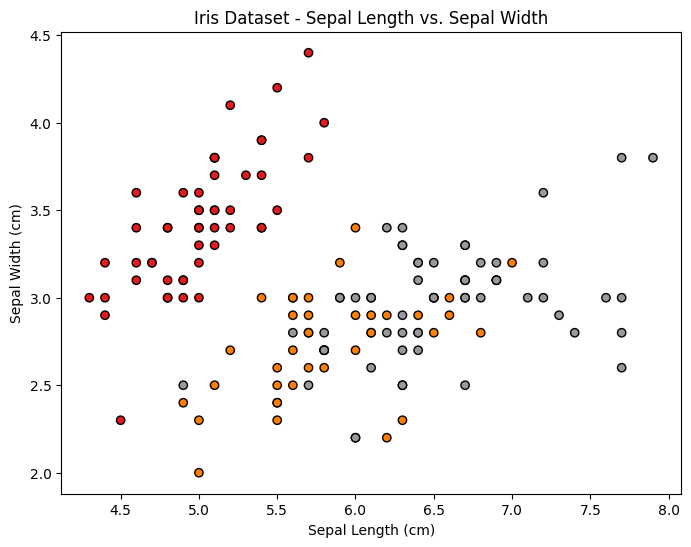

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Sepal Length vs. Sepal Width')
plt.show()

## Preprocess the dataset

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Define the neural network model

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(4, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 3)
        )

    def forward(self, x):
        return self.classifier(x)

# Step 4: Initialize the model, loss function, and optimizer

In [ ]:
model = SimpleNN()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 5: Train the model

In [ ]:
X = torch.FloatTensor(X_train).to(device)
y = torch.LongTensor(y_train).to(device)

epochs = 200
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
      print('[%d/%d] loss: %.5f' % (epoch + 1, epochs, loss.item()))

[10/200] loss: 1.02151
[20/200] loss: 0.91259
[30/200] loss: 0.79405
[40/200] loss: 0.66656
[50/200] loss: 0.54282
[60/200] loss: 0.44065
[70/200] loss: 0.36299
[80/200] loss: 0.30121
[90/200] loss: 0.24944
[100/200] loss: 0.20567
[110/200] loss: 0.16989
[120/200] loss: 0.14146
[130/200] loss: 0.11963
[140/200] loss: 0.10333
[150/200] loss: 0.09113
[160/200] loss: 0.08181
[170/200] loss: 0.07457
[180/200] loss: 0.06902
[190/200] loss: 0.06459
[200/200] loss: 0.06085


# Step 6: Make predictions and evaluate the model

In [ ]:
X = torch.Tensor(X_test).to(device)

with torch.no_grad():
    predicted = model(X)
    _, predicted_labels = torch.max(predicted, 1)
    accuracy = accuracy_score(y_test, predicted_labels.detach().cpu().numpy())

print(f"Accuracy on test data: {accuracy * 100:.2f}%")

Accuracy on test data: 100.00%
